# Task 1

In [1]:
import os
import datetime
import pytz

In [2]:
h5_file="1541962108935000000_167_838.h5"
file_name=os.path.splitext(h5_file)[0]
time_pico=int(file_name.split("_")[0])

In [3]:
cern_timezone=pytz.timezone("Europe/Zurich")
utc_time=datetime.datetime.utcfromtimestamp(time_pico/1e9)
cern_time=datetime.datetime.fromtimestamp(time_pico/1e9,cern_timezone)

In [4]:
print("UTC Time",utc_time)
print("Cern TIme", cern_time)

UTC Time 2018-11-11 18:48:28.935000
Cern TIme 2018-11-11 19:48:28.935000+01:00


# Task 2

In [5]:
import h5py
import pandas as pd

In [6]:
f=h5py.File("1541962108935000000_167_838.h5","r")

In [7]:
gp_list=[]
ds_list=[]

dic={}
def go_through(name,element):
    if isinstance(element,h5py.Group):
        dic[name]=["Group","","",""]
    if isinstance(element,h5py.Dataset):
        dtype=""
        try: #typebit
            dtype=element.dtype
        except TypeError as e:
            dtype=str(e).split(" ")[-2]
            
        dic[name]=["Dataset",element.size,element.shape,dtype]
    

In [8]:
f.visititems(go_through)

In [9]:
df=pd.DataFrame.from_dict(dic,orient='index',columns=["Type","Size","Shape","Type"])
df.to_csv("data.csv")

# Task 3

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

In [11]:
img_array=f.get("/AwakeEventData/XMPP-STREAK/StreakImage/streakImageData")
img_h=f.get("AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight")[0]
img_w=f.get("AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth")[0]

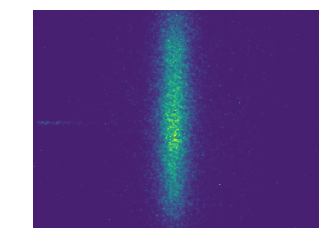

In [12]:
img=np.reshape(img_array,(img_h,img_w))
img_filtered=medfilt(img)
plt.axis('off')
plt.imshow(img_filtered)
plt.savefig("image.png")